In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, fftshift, fftn,ifftn
pi=np.pi

# Aliasing

Before getting into the fourier transform, we should see how aliasing works. Call that for $t_n = n\Delta t$, for $n=0,..,N-1$, the Nyquist frequency is 

$$\omega_{\rm Nyquist} = \pi / \Delta t$$

and the lowest non-zero frequency is 

$$\omega_{\rm min} = \pi / (N\Delta t) = \pi / T$$

Suppose we take $T = \pi$ and $\Delta t = 0.025*\pi$ (so that $N=40$). That the Nyquist frequency is $40$.

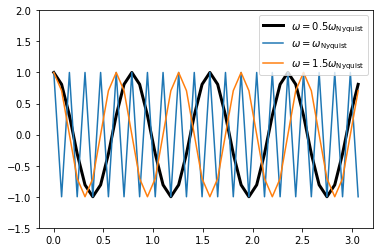

In [41]:
time=np.arange(0.,pi,step=0.025*pi)
omegaN=40
signal0=np.cos(0.2*omegaN*time)
signal1=np.cos(omegaN*time)
signal2=np.cos((1.75)*omegaN*time)

#signal3=np.cos(0.1*omegaN*time)
plt.plot(time,signal0,label=r'$\omega=0.5\omega_{\rm Nyquist}$',lw=3,c='black')
plt.plot(time,signal1,label=r'$\omega=\omega_{\rm Nyquist}$')
plt.plot(time,signal2,label=r'$\omega=1.5\omega_{\rm Nyquist}$')

plt.ylim(-1.5,2)
plt.legend()
plt.show()

The orange line is the result of aliasing: even though it has a higher frequency, it looks to use like it has a lower frequency than the black line.

To understand what's happening, we can look at the same curve, just with a small $\Delta t$ so that we increase the Nyquist frequency:

(0.0, 1.0)

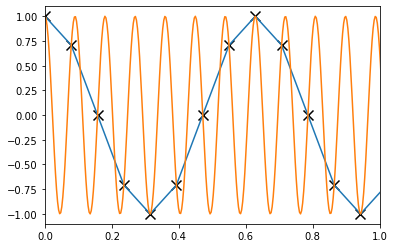

In [59]:
t1=np.arange(0.,pi,step=0.025*pi)
t2=np.arange(0.,pi,step=0.001*pi)
s1=np.cos(70*t1)
s2=np.cos(70*t2)
plt.plot(t1,s1)
plt.plot(t2,s2)
plt.scatter(t1,s1,marker='x',s=100,c='black')
plt.xlim(0,1)

Even though the two curves look totally different, the actual data that generates our blue curve is the data marked with an $x$. Notice that every point is also a point on the orange curve as well. The orange curve represents the actual function used to generate the black points, but due to aliasing, that is not obvious.

This phenomena is the same one our discrete fourier transform will be sensitive to as well.

# Fast Fourier Transform

The DFT is a very important practical tool. As such, it is important to see how to use it in practice and not just the theoretical properties. To start, we can apply it so a pure imaginary exponential, where we should see only one peak:

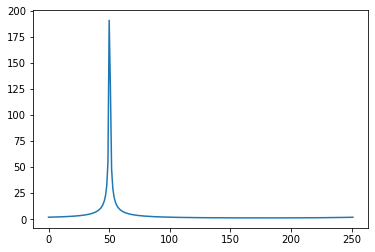

In [120]:
#Let's just make sure this works
time=np.arange(0.,8*pi,step=0.1)

testsig=np.exp(2*complex(0,1)*2*pi*time)
#put in a pure frequency

#Compute fft
ffttest=fft(testsig)
intlist=np.arange(len(time))
plt.plot(intlist,np.abs(ffttest))

#We rescale the frequency to be an angular frequency
plt.show()

Now let's repeat with a cosine, where we would expect a peak at positive and negative frquencies

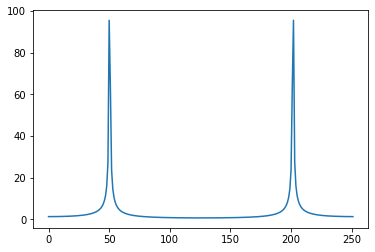

In [122]:
cossig=np.cos(2*2*pi*time)

#Compute fft
fftcos=fft(cossig)
intlist=np.arange(len(time))
plt.plot(intlist,np.abs(fftcos))
plt.show()

We see one of the peaks at a positive integer value. To fix this we need to calcualte the frequenices:

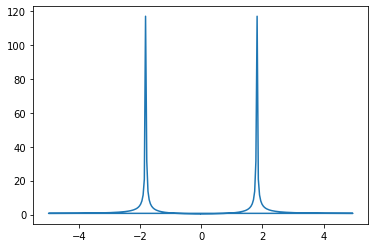

In [123]:
#Now we shift the frequencies

freq_list=fftfreq(cossig.size, d=0.1)
plt.plot(freq_list,np.abs(fft_shift))

#We rescale the frequency to be an angular frequency
plt.show()

We notice the line on the bottom. This is because the frequencies are still listed in the same order as the integer above. I.e. we never fixed the issue of where in the list the negative frequency appears. We can see that by printing the list:

In [124]:
print(freq_list[0:5],freq_list[-5:])

[0.         0.03968254 0.07936508 0.11904762 0.15873016] [-0.1984127  -0.15873016 -0.11904762 -0.07936508 -0.03968254]


There is a build in function that fixes this for us:

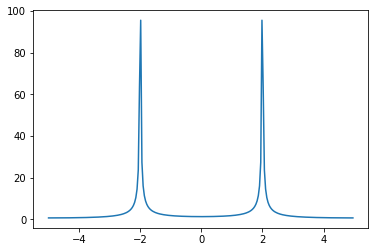

In [133]:
#Now we shift the frequencies
fft_shift=fftshift(fft(cossig))
freq_shift=fftshift(fftfreq(cossig.size, d=0.1))
plt.plot(freq_shift,np.abs(fft_shift))

#We rescale the frequency to be an angular frequency
plt.show()

In [134]:
print(freq_shift[0:5],freq_shift[-5:])

[-5.         -4.96031746 -4.92063492 -4.88095238 -4.84126984] [4.8015873  4.84126984 4.88095238 4.92063492 4.96031746]


Now we want to understand how the fft behaves as we decrease the spacing between points:

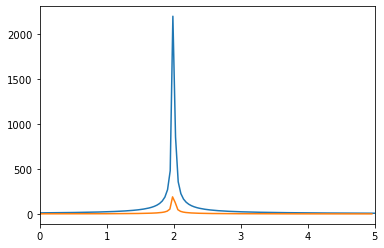

In [139]:
#Let's just make sure this works
t2=np.arange(0.,8*pi,step=0.01)

testsig2=np.exp(2*complex(0,1)*2*pi*t2)
#put in a pure frequency

#Compute fft
ffttest2=fftshift( fft(testsig2))

#determine frequencies
freqtest2= fftshift(fftfreq(testsig2.size, d=0.01))
plt.xlim(0,5)
plt.plot(freqtest2,np.abs(ffttest2))
plt.plot(freq_shift,np.abs(fftshift(ffttest)))
#We rescale the frequency to be an angular frequency
plt.show()

First, we notice that the hight it much larger for curve for $\Delta t=0.01$. This is just the factor of $N$ we expected in the sum. Removing that normalization, we get similar results

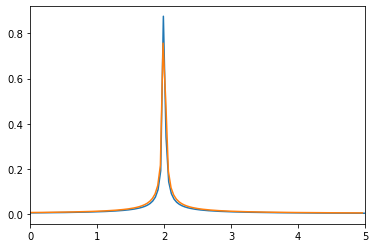

In [142]:
plt.xlim(0,5)
plt.plot(freqtest2,np.abs(ffttest2)/len(ffttest2))
plt.plot(freq_shift,np.abs(fftshift(ffttest))/len(ffttest))
#We rescale the frequency to be an angular frequency
plt.show()

Notice that these curves have an actual shape! It isn't just a single frquency. Why did this happen? The issue is that we didn't put in one of the integer frequencies that is periodic on our list. Let's try again, using one of the frequencies from the list.

To make it more clear, we can also increase the length of time of one of the signals. If the curves is just a signal frequency, we will see the curves get sharper as the spacing between frequencies scales as $\Delta \omega = \pi/T$.

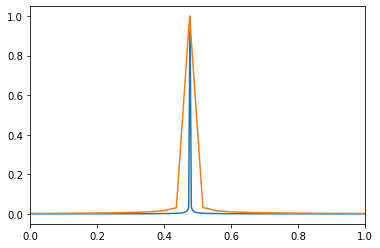

In [155]:
t3=np.arange(0.,80*pi,step=0.1)
testsig3=np.exp(3*complex(0,1)*t3)
testsig4=np.exp(3*complex(0,1)*time)
#put in a pure frequency

#Compute fft
ffttest3=fftshift( fft(testsig3))
ffttest4=fftshift( fft(testsig4))
freqtest3= fftshift(fftfreq(testsig3.size, d=0.1))
#determine frequencies
plt.xlim(0,1)
plt.plot(freqtest3,np.abs(ffttest3)/len(ffttest3))
plt.plot(freq_shift,np.abs(ffttest4)/len(ffttest4))
#We rescale the frequency to be an angular frequency
plt.show()

Another canonical fourier transform is the Gaussian:

[0.   0.05 0.1  0.15 0.2 ] [-0.25 -0.2  -0.15 -0.1  -0.05]
[-5000.   -4999.95 -4999.9  -4999.85 -4999.8 ] [4999.75 4999.8  4999.85 4999.9  4999.95]


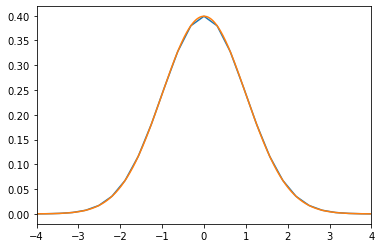

In [157]:
# Now let's try a gaussian

spacing=0.0001

t = np.arange(-10,10,step=spacing)

signal = np.exp(-t**2/2.)/np.sqrt(2*pi)
# This is a gaussian with variance 1 in real time

ft= fft(signal)
#This is the 1d discrete fourier transform

freq = fftfreq(signal.size, d=spacing)
#This is the array of frequencies

sfreq=fftshift(freq)
sft=fftshift(ft)
#fftshifts just changes to binning so that it runs from -nyquist to + nyquist

print(sfreq[0:5],sfreq[-5:])
#prints [-500.   -499.95 -499.9  -499.85 -499.8 ] [ 499.75  499.8   499.85  499.9  499.95]

# Now we can also check that we need to scale both the amplitude of the fft and the frequency to reproduce the gaussian with variance = 1.

plt.figure()
plt.plot(sfreq*(2*pi), np.absolute(sft)*spacing/np.sqrt(2*pi))
#We need to work in angular frequencies.  We also need to rescale our fft by the spacing
plt.plot(t,signal)
plt.xlim(-4, 4)
plt.show()

We see explicitely that the fourier transform of a Gaussian is a Gaussian.

The same principles apply to functions of more than one variable. We just take the fft in all the directions at once. Here is where we use meshgrid again:

/var/folders/vh/rcz751b57355h3qzj37sc3080000gp/T/ipykernel_13005/2883857003.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(kx,ky,np.abs(fft2d))


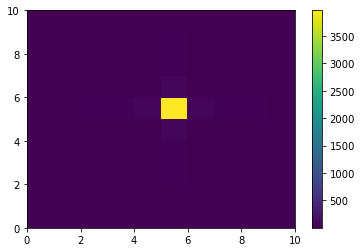

In [8]:
x,y = np.meshgrid(np.arange(0,2*pi,step=0.1),np.arange(0,2*pi,step=0.1))
signal2d= np.exp(complex(0,1)*5*(x+y))

fft2d=fftshift(fftn(signal2d))
#Getting the 2d fourier transform is basca

kx_vec = 2.0*pi*fftshift(fftfreq(fft2d.shape[0], d=0.1))
ky_vec = 2.0*pi*fftshift(fftfreq(fft2d.shape[1], d=0.1))
kx, ky = np.meshgrid(kx_vec,ky_vec)



plt.figure()
plt.pcolormesh(kx,ky,np.abs(fft2d))
plt.axis([0,10,0,10])
plt.colorbar()
plt.show()

What you should notice here is a big spike at $k_x = 5$ and $k_y=5$ as we input.

One of the most important reasons to use a fft in more than one variable is for image processing. The reason is that most images involve a convolution between your signal of interest and something in between your signal and final measurement which blurs or distorts your signal. This could include the effect of the lens, etc.

Now we recall that convolutions in space are just products in fourier space. We we can model, or undo, any convolution using the fourier transform

In [9]:
import matplotlib.image as mpimg

img=mpimg.imread('M31.jpg')

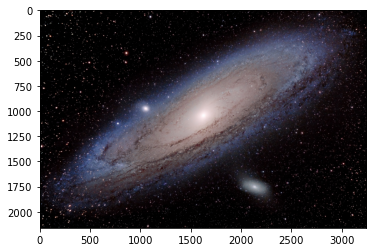

In [10]:
imgplot = plt.imshow(img)

In [11]:
imgfft=fftn(img)

In [12]:
kx_vec = 2.0*pi*fftfreq(imgfft.shape[0])
ky_vec = 2.0*pi*fftfreq(imgfft.shape[1])
kx, ky = np.meshgrid(kx_vec,ky_vec,indexing='ij')

In [13]:
imgfft_b=imgfft

In [14]:
kx.shape

(2160, 3240)

In [15]:
for i in range(3):
    imgfft_b[:,:,i]=imgfft[:,:,i]*np.exp(-1000*(kx**2+ky**2))

In [16]:
img_b=ifftn(imgfft_b).astype(int)

/var/folders/vh/rcz751b57355h3qzj37sc3080000gp/T/ipykernel_13005/13139335.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  img_b=ifftn(imgfft_b).astype(int)


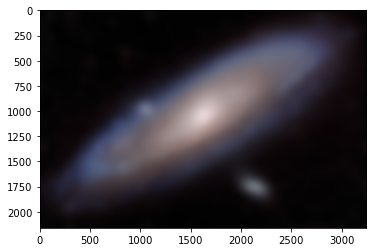

In [18]:
imgplot = plt.imshow(img_b)